# Exploratory Data Analysis

Link Youtube : https://youtu.be/iUyzJjFzcrY

Muhammad Razan Parisya Putra (5026231174) <br>
Muhammad Ade Dzakwan (5026231154) <br>
Zihni Aryanto Putra Buana (5026231012) <br>
Ayesha Hana Azkiya (5026231125) <br>

## Import Dataset

In [26]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import pandas as pd

# Load application data
df = pd.read_csv('application_train.csv')

# Display first few rows
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Struktur Dataset

In [27]:
# Menampilkan 5 baris pertama dataset
print("5 Baris Pertama Dataset Home Credit:")
print(df.head())

# Menampilkan informasi dasar tentang dataset
print("\nInformasi Dataset:")
print(df.info())

# Menampilkan jumlah baris dan kolom
print(f"\nJumlah Baris: {df.shape[0]}, Jumlah Kolom: {df.shape[1]}")

# Menampilkan tipe data setiap kolom
print("\nTipe Data Setiap Kolom:")
print(df.dtypes)

# Menampilkan jumlah nilai yang hilang per kolom
print("\nJumlah Nilai yang Hilang per Kolom:")
print(df.isnull().sum())

5 Baris Pertama Dataset Home Credit:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \


# Penanganan Missing Values dan Data Cleaning

## Penanganan Missing Values

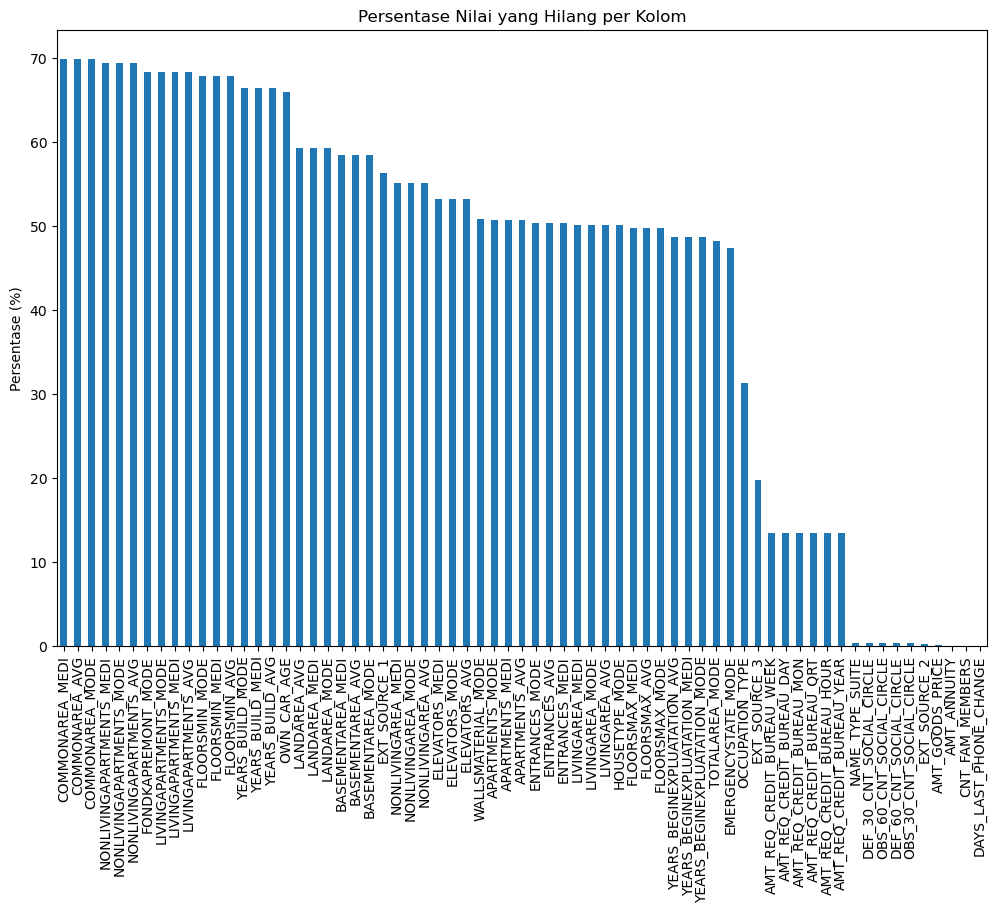


Kolom dengan nilai yang hilang lebih dari 50%:
COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE           

In [28]:
import matplotlib.pyplot as plt

# Menghitung persentase nilai yang hilang per kolom
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Visualisasi nilai yang hilang
plt.figure(figsize=(12, 8))
missing_percent.plot(kind='bar')
plt.title('Persentase Nilai yang Hilang per Kolom')
plt.ylabel('Persentase (%)')
plt.show()

print("\nKolom dengan nilai yang hilang lebih dari 50%:")
print(missing_percent[missing_percent > 40])

In [29]:
# Drop kolom dengan missing > 60%
threshold = 0.6  # 60%
df_drop = df.loc[:, df.isnull().mean() < threshold]
print(f'Shape sebelum drop kolom: {df.shape}')
print(f'Shape setelah drop kolom: {df_drop.shape}')

Shape sebelum drop kolom: (307511, 122)
Shape setelah drop kolom: (307511, 105)


In [30]:
from sklearn.impute import SimpleImputer

# Misalkan df_drop adalah subset dari df (contoh)
df_drop = df.copy()  # Pastikan df_drop adalah salinan independen

# Identifikasi kolom numerik
numerical_cols = df_drop.select_dtypes(include=['int64', 'float64']).columns

# Imputasi kolom numerik
imputer_num = SimpleImputer(strategy='mean')
df_drop.loc[:, numerical_cols] = imputer_num.fit_transform(df_drop[numerical_cols])

In [31]:
df_drop = df.copy()  # Gunakan .copy() untuk menghindari view

# Imputasi untuk kolom numerik
numerical_cols = df_drop.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col not in ['TARGET', 'SK_ID_CURR']]

# Menggunakan median untuk imputasi (karena lebih robust terhadap outlier)
imputer_num = SimpleImputer(strategy='median')
df_drop.loc[:, numerical_cols] = imputer_num.fit_transform(df_drop[numerical_cols])

In [32]:
# Memeriksa apakah masih ada missing values
print("Jumlah missing values:")
print(df_drop.isnull().sum().sum())

Jumlah missing values:
764371


## Penghapusan Outlier

In [33]:
# Fungsi untuk analisis outlier
def analyze_outliers(df_drop, columns, threshold=1.5):
    outlier_report = {}
    
    for col in columns:
        Q1 = df_drop[col].quantile(0.25)
        Q3 = df_drop[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        outliers = df_drop[(df_drop[col] < lower_bound) | (df_drop[col] > upper_bound)]
        
        outlier_report[col] = {
            'n_outliers': len(outliers),
            'pct_outliers': f"{len(outliers)/len(df)*100:.2f}%",
            'min_val': df_drop[col].min(),
            'max_val': df_drop[col].max(),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    
    return pd.DataFrame(outlier_report).T

key_columns = [
    'AMT_INCOME_TOTAL', 
    'AMT_CREDIT', 
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED'
]

# Analisis outlier
outlier_analysis = analyze_outliers(df, key_columns)
print("Analisis Outlier Awal:")
display(outlier_analysis)

Analisis Outlier Awal:


,n_outliers,pct_outliers,min_val,max_val,lower_bound,upper_bound
AMT_INCOME_TOTAL,14035,4.56%,25650.0,117000000.0,-22500.0,337500.0
AMT_CREDIT,6562,2.13%,45000.0,4050000.0,-537975.0,1616625.0
AMT_ANNUITY,7504,2.44%,1615.5,258025.5,-10584.0,61704.0
AMT_GOODS_PRICE,14728,4.79%,40500.0,4050000.0,-423000.0,1341000.0
DAYS_BIRTH,0,0.00%,-25229,-7489,-30585.5,-1509.5
DAYS_EMPLOYED,72217,23.48%,-17912,365243,-6466.5,3417.5


In [34]:
import numpy as np
def winsorize_data(df, columns, threshold=1.5):
    """
    Mengganti outlier dengan nilai batas menggunakan pendekatan winsorizing
    threshold: 3.0 untuk lebih longgar (3 x IQR)
    """
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Capping
        df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
        df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])
    
    return df_clean

# Terapkan winsorizing
df_no_outliers= winsorize_data(df_drop, key_columns, threshold=3.0)


Analisis Setelah Penanganan Outlier:


,n_outliers,pct_outliers,min_val,max_val,lower_bound,upper_bound
AMT_INCOME_TOTAL,14035,4.56%,25650.0,117000000.0,-22500.0,337500.0
AMT_CREDIT,6562,2.13%,45000.0,4050000.0,-537975.0,1616625.0
AMT_ANNUITY,7504,2.44%,1615.5,258025.5,-10584.0,61704.0
AMT_GOODS_PRICE,14728,4.79%,40500.0,4050000.0,-423000.0,1341000.0
DAYS_BIRTH,0,0.00%,-25229,-7489,-30585.5,-1509.5
DAYS_EMPLOYED,72217,23.48%,-17912,365243,-6466.5,3417.5


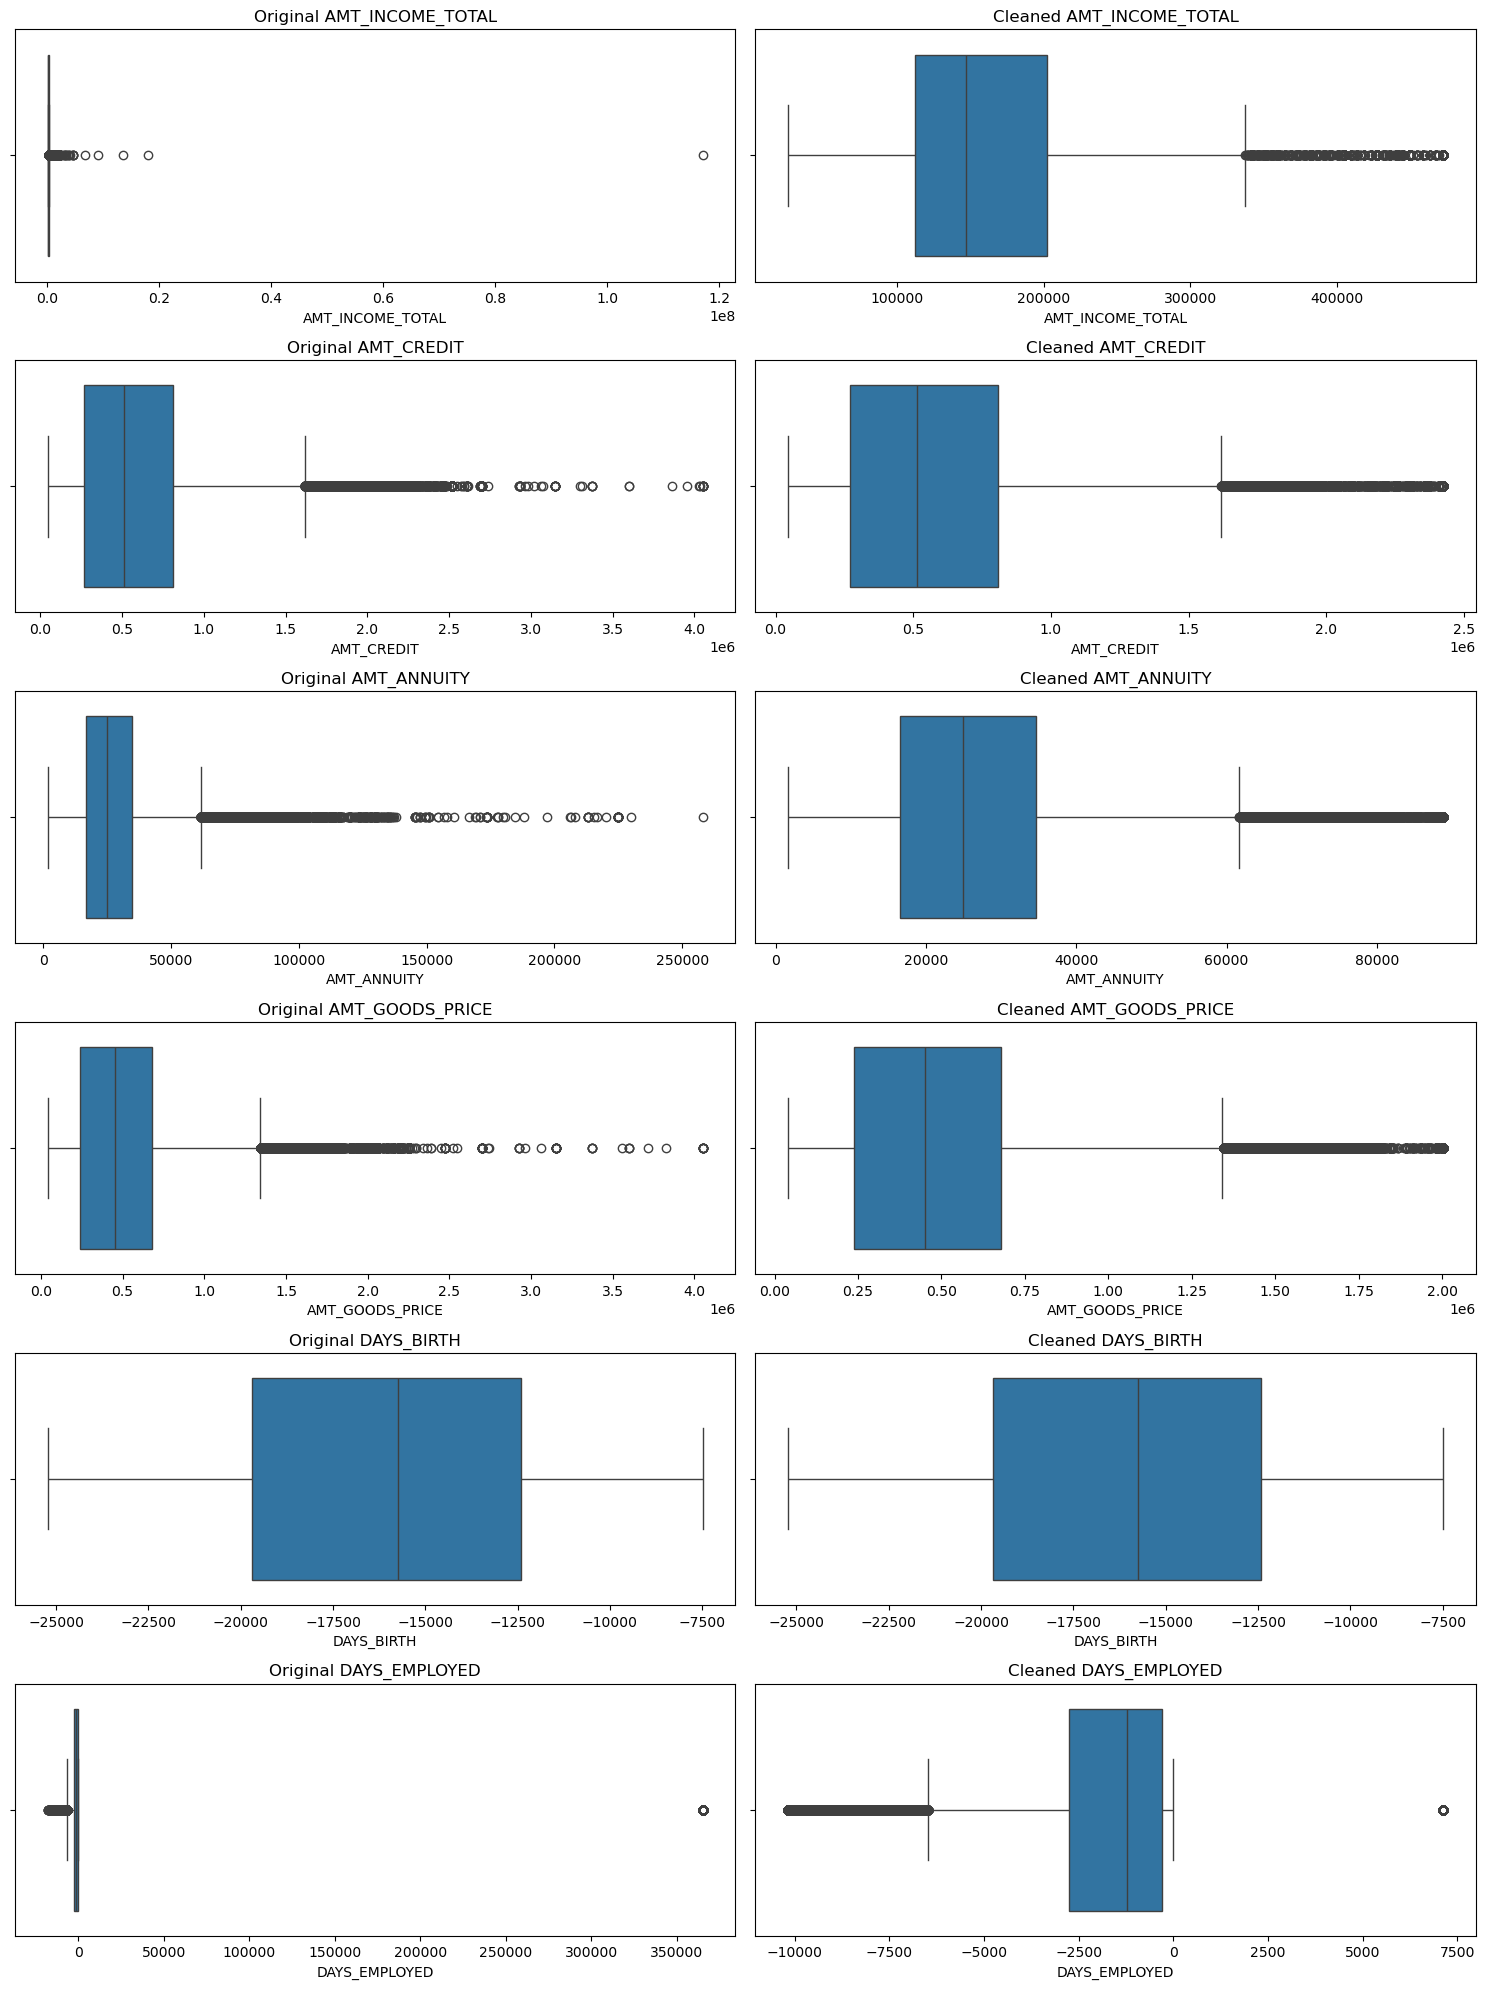


Dimensi dataset sebelum cleaning: (307511, 122)
Dimensi dataset setelah cleaning: (307511, 122)


In [35]:
import seaborn as sns

# Analisis setelah penanganan
print("\nAnalisis Setelah Penanganan Outlier:")
outlier_analysis_clean = analyze_outliers(df_drop, key_columns)
display(outlier_analysis_clean)

# Visualisasi perbandingan
fig, axes = plt.subplots(len(key_columns), 2, figsize=(15, 20))
for i, col in enumerate(key_columns):
    # Sebelum
    sns.boxplot(x=df_drop[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'Original {col}')
    
    # Sesudah
    sns.boxplot(x=df_no_outliers[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Cleaned {col}')
    
plt.tight_layout()
plt.show()

# Periksa ukuran dataset
print(f"\nDimensi dataset sebelum cleaning: {df_drop.shape}")
print(f"Dimensi dataset setelah cleaning: {df_no_outliers.shape}")

In [36]:
# Verifikasi untuk satu kolom contoh
col = key_columns[0]  # ambil kolom pertama

Q1 = df_drop[col].quantile(0.25)
Q3 = df_drop[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3.0 * IQR
upper_bound = Q3 + 3.0 * IQR

# Cek apakah masih ada nilai di luar bounds
outliers_exist = ((df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound)).any()
print(f"Apakah masih ada outlier di kolom {col} setelah winsorizing? {outliers_exist}")

# Cek nilai min/max sebelum dan sesudah
print(f"\nKolom: {col}")
print(f"Sebelum - Min: {df_drop[col].min()}, Max: {df_drop[col].max()}")
print(f"Sesudah - Min: {df_no_outliers[col].min()}, Max: {df_no_outliers[col].max()}")

Apakah masih ada outlier di kolom AMT_INCOME_TOTAL setelah winsorizing? False

Kolom: AMT_INCOME_TOTAL
Sebelum - Min: 25650.0, Max: 117000000.0
Sesudah - Min: 25650.0, Max: 472500.0


In [37]:
df_no_outliers.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Transformasi dan Rekayasa Fitur

## Encoding Variabel Kategorikal

In [38]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Memisahkan kolom kategorikal
categorical_cols = df_no_outliers.select_dtypes(include=['object']).columns

# One-Hot Encoding untuk kolom dengan cardinality rendah (<10 nilai unik)
low_cardinality_cols = [col for col in categorical_cols if df_no_outliers[col].nunique() < 10]

# Label Encoding untuk kolom dengan cardinality tinggi
high_cardinality_cols = [col for col in categorical_cols if df_no_outliers[col].nunique() >= 10]

# Melakukan One-Hot Encoding
df_encoded = pd.get_dummies(df_no_outliers, columns=low_cardinality_cols, drop_first=True)

# Melakukan Label Encoding untuk kolom dengan cardinality tinggi
label_encoder = LabelEncoder()
for col in high_cardinality_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

print("\nShape setelah encoding:", df_encoded.shape)


Shape setelah encoding: (307511, 158)


In [39]:
df_encoded.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,False,False,False,False,False,False,False,True,False,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,False,False,False,False,False,False,False,False,False,False


## Normalisasi & Standarisasi

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Memisahkan fitur dan target
X = df_encoded.drop(columns=['TARGET', 'SK_ID_CURR'])
y = df_encoded['TARGET']

# Daftar kolom numerik untuk diskalakan
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Standarisasi (Z-score normalization)
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Alternatif: Normalisasi Min-Max
# minmax_scaler = MinMaxScaler()
# X[numeric_cols] = minmax_scaler.fit_transform(X[numeric_cols])

print("\nContoh data setelah standarisasi:")
print(X[numeric_cols].head())


Contoh data setelah standarisasi:
   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0     -0.577538          0.439112   -0.479199    -0.166412        -0.510725   
1     -0.577538          1.251745    1.732722     0.616017         1.622519   
2     -0.577538         -1.186154   -1.156557    -1.443461        -1.102608   
3     -0.577538         -0.373521   -0.713421     0.188307        -0.658696   
4     -0.577538         -0.536048   -0.213834    -0.368102        -0.066813   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                   -0.149452    1.506880       0.002459           0.379837   
1                   -1.252750   -0.166821      -0.130061           1.078697   
2                   -0.783451   -0.689509       0.101549           0.206116   
3                   -0.928991   -0.680114      -0.575245          -1.375829   
4                    0.563570   -0.892535      -0.575004           0.191639   

   DAYS_ID_PUBL

In [41]:
df_encoded.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,False,False,False,False,False,False,False,True,False,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,False,False,False,False,False,False,False,False,False,False


## Fitur Baru

In [42]:
# Membuat fitur baru: Rasio Kredit terhadap Pendapatan
df_encoded['CREDIT_INCOME_RATIO'] = df_encoded['AMT_CREDIT'] / df_encoded['AMT_INCOME_TOTAL']

# Membuat fitur baru: Rasio Anuitas terhadap Pendapatan
df_encoded['ANNUITY_INCOME_RATIO'] = df_encoded['AMT_ANNUITY'] / df_encoded['AMT_INCOME_TOTAL']

# Membuat fitur baru: Usia dalam tahun (dari DAYS_BIRTH)
df_encoded['AGE_YEARS'] = abs(df_encoded['DAYS_BIRTH']) / 365

# Membuat fitur baru: Lama bekerja dalam tahun (dari DAYS_EMPLOYED)
df_encoded['WORKING_YEARS'] = abs(df_encoded['DAYS_EMPLOYED']) / 365

# Membuat fitur baru: Persentase hari bekerja dari usia
df_encoded['WORKING_LIFE_RATIO'] = abs(df_encoded['DAYS_EMPLOYED']) / abs(df_encoded['DAYS_BIRTH'])

# Memeriksa fitur baru
print("\nFitur baru yang dibuat:")
new_features = ['CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'AGE_YEARS', 'WORKING_YEARS', 'WORKING_LIFE_RATIO']
print(df_encoded[new_features].describe())


Fitur baru yang dibuat:
       CREDIT_INCOME_RATIO  ANNUITY_INCOME_RATIO      AGE_YEARS  \
count        307511.000000         307511.000000  307511.000000   
mean              3.962897              0.181026      43.936973   
std               2.684737              0.094020      11.956133   
min               0.095238              0.008700      20.517808   
25%               2.027183              0.115270      34.008219   
50%               3.275862              0.162933      43.150685   
75%               5.159467              0.228800      53.923288   
max              84.736842              1.875965      69.120548   

       WORKING_YEARS  WORKING_LIFE_RATIO  
count  307511.000000       307511.000000  
mean        8.802426            0.186891  
std         7.444760            0.135954  
min         0.000000            0.000000  
25%         2.556164            0.068385  
50%         6.079452            0.155791  
75%        15.635616            0.305463  
max        27.871233       

In [43]:
df_encoded.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,AGE_YEARS,WORKING_YEARS,WORKING_LIFE_RATIO
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,False,False,True,False,False,2.007889,0.121978,25.920548,1.745205,0.067329
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,False,False,False,False,False,4.790750,0.132217,45.931507,3.254795,0.070862
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,False,False,False,False,False,2.000000,0.100000,52.180822,0.616438,0.011814
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,False,False,False,False,False,2.316167,0.219900,52.068493,8.326027,0.159905
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,False,False,False,False,False,4.222222,0.179963,54.608219,8.323288,0.152418


# Data Splitting

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Memisahkan fitur dan target
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

# Menampilkan statistik awal
print("=== Statistik Data Awal ===")
print(f"Jumlah total sampel: {len(df)}")
print(f"Jumlah fitur: {X.shape[1]}")
print("\nDistribusi kelas:")
print(y.value_counts(normalize=True))

=== Statistik Data Awal ===
Jumlah total sampel: 307511
Jumlah fitur: 162

Distribusi kelas:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


## Pembagian Data Training (75%) dan Testing (25%) dengan Stratified Sampling

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler  # For balancing

# Menampilkan statistik awal (from your previous code)
print("=== Statistik Data Awal ===")
print(f"Jumlah total sampel: {len(df)}")
print(f"Jumlah fitur: {X.shape[1]}")
print("\nDistribusi kelas:")
print(y.value_counts(normalize=True))

# Balance the dataset using RandomOverSampler before splitting
print("\n=== Balancing Dataset ===")
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X, y)

# Menampilkan distribusi kelas setelah balancing
print("Distribusi kelas setelah balancing:")
print(y_balanced.value_counts(normalize=True))
print(f"Jumlah total sampel setelah balancing: {len(y_balanced)}")

# Pembagian data dengan stratified sampling on the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, 
    y_balanced, 
    test_size=0.25, 
    random_state=42,  # Untuk reproducibility
    stratify=y_balanced  # Stratified sampling to maintain balanced distribution
)

# Menampilkan statistik hasil pembagian
print("\n=== Hasil Pembagian Data ===")
print(f"Jumlah data training: {len(X_train)} ({len(X_train)/len(y_balanced)*100:.1f}%)")
print(f"Jumlah data testing: {len(X_test)} ({len(X_test)/len(y_balanced)*100:.1f}%)")

print("\nDistribusi kelas pada data training:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi kelas pada data testing:")
print(y_test.value_counts(normalize=True))

=== Statistik Data Awal ===
Jumlah total sampel: 307511
Jumlah fitur: 162

Distribusi kelas:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

=== Balancing Dataset ===
Distribusi kelas setelah balancing:
TARGET
1    0.5
0    0.5
Name: proportion, dtype: float64
Jumlah total sampel setelah balancing: 565372

=== Hasil Pembagian Data ===
Jumlah data training: 424029 (75.0%)
Jumlah data testing: 141343 (25.0%)

Distribusi kelas pada data training:
TARGET
1    0.500001
0    0.499999
Name: proportion, dtype: float64

Distribusi kelas pada data testing:
TARGET
0    0.500004
1    0.499996
Name: proportion, dtype: float64


## 10-Fold Cross Validation Stratified

In [46]:
# 10-fold stratified cross validation
skf = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=42
)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    print(f"\nFold {fold + 1}:")
    print(f"  Training: index {train_idx[0]}..{train_idx[-1]}")
    print(f"  Validation: index {val_idx[0]}..{val_idx[-1]}")
    print(f"  Class distribution in validation: {np.bincount(y_train.iloc[val_idx])}")


Fold 1:
  Training: index 0..424028
  Validation: index 2..424019
  Class distribution in validation: [21201 21202]

Fold 2:
  Training: index 1..424028
  Validation: index 0..424016
  Class distribution in validation: [21201 21202]

Fold 3:
  Training: index 0..424028
  Validation: index 3..424021
  Class distribution in validation: [21201 21202]

Fold 4:
  Training: index 0..424028
  Validation: index 4..424014
  Class distribution in validation: [21201 21202]

Fold 5:
  Training: index 0..424028
  Validation: index 16..424022
  Class distribution in validation: [21201 21202]

Fold 6:
  Training: index 0..424027
  Validation: index 8..424028
  Class distribution in validation: [21202 21201]

Fold 7:
  Training: index 0..424028
  Validation: index 7..424027
  Class distribution in validation: [21202 21201]

Fold 8:
  Training: index 0..424028
  Validation: index 1..424017
  Class distribution in validation: [21202 21201]

Fold 9:
  Training: index 0..424028
  Validation: index 5..424

## Transformasi Data (Standardisasi)

In [47]:
# Transformasi data (standardisasi)
scaler = StandardScaler()

# Hanya fit pada data training untuk menghindari data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame untuk mempertahankan nama kolom
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nContoh data setelah standardisasi:")
print(X_train_scaled.head())


Contoh data setelah standardisasi:
   SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0    0.841006     -0.594451         -0.349979   -0.706380    -0.866935   
1    1.027013     -0.594451          1.222391    0.677565    -0.167082   
2   -0.832234      2.118561          3.580945   -1.083270    -0.645022   
3    0.374957      0.762055          0.492362    0.483705     3.433516   
4    0.565818     -0.594451          1.334703    0.393253     0.885063   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        -0.810918                   -1.156608   -0.786805       0.117918   
1         0.533182                    2.010613   -1.004400       2.045980   
2        -1.074467                   -0.823734    0.611029      -0.942896   
3         0.638601                    0.392654    0.346955      -0.254546   
4         0.467295                   -0.641699   -0.713965      -0.304574   

   DAYS_REGISTRATION  ...  WALLSMATERIAL_MODE_Others  \


## Verifikasi Pembagian Data

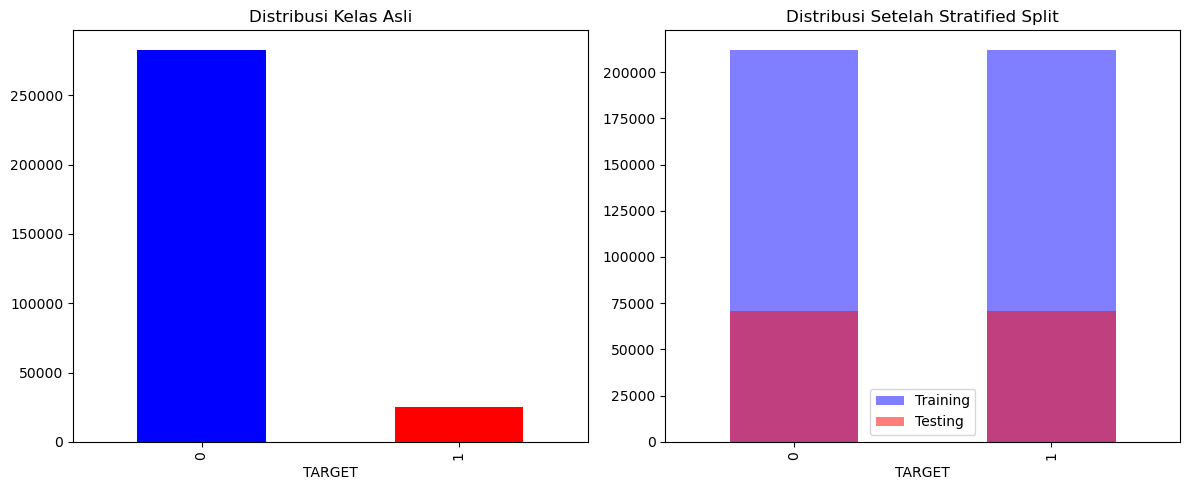

In [48]:
# Visualisasi pembagian data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Distribusi kelas asli
plt.subplot(1, 2, 1)
y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribusi Kelas Asli')

# Distribusi setelah split
plt.subplot(1, 2, 2)
pd.Series(y_train).value_counts().plot(kind='bar', color='blue', alpha=0.5, label='Training')
pd.Series(y_test).value_counts().plot(kind='bar', color='red', alpha=0.5, label='Testing')
plt.title('Distribusi Setelah Stratified Split')
plt.legend()

plt.tight_layout()
plt.show()

# Naïve Bayes Classification

### 10-fold cross validation

In [25]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

nb_model = GaussianNB()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = []

print("10-fold cross validation...")
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train), 1):
    X_train_fold, X_val_fold = X_train_scaled.iloc[train_idx], X_train_scaled.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    print(f"Fold {fold}")
    print(f"  Train: index={train_idx[:5]}... ({len(train_idx)} rows)")
    print(f"  Test:  index={val_idx[:5]}... ({len(val_idx)} rows)")
    
    # Training model
    nb_model.fit(X_train_fold, y_train_fold)
    
    # Prediksi
    y_pred = nb_model.predict(X_val_fold)
    y_proba = nb_model.predict_proba(X_val_fold)[:, 1]
    
    # Hitung metrik
    cv_results.append({
        'fold': fold,
        'accuracy': accuracy_score(y_val_fold, y_pred),
        'precision': precision_score(y_val_fold, y_pred),
        'recall': recall_score(y_val_fold, y_pred),
        'f1': f1_score(y_val_fold, y_pred),
        'roc_auc': roc_auc_score(y_val_fold, y_proba)
    })

print("Done")

10-fold cross validation...
Fold 1
  Train: index=[0 1 3 4 5]... (381626 rows)
  Test:  index=[ 2 15 19 21 22]... (42403 rows)
Fold 2
  Train: index=[1 2 3 4 5]... (381626 rows)
  Test:  index=[ 0 12 27 29 35]... (42403 rows)
Fold 3
  Train: index=[0 1 2 4 5]... (381626 rows)
  Test:  index=[ 3 40 47 52 86]... (42403 rows)
Fold 4
  Train: index=[0 1 2 3 5]... (381626 rows)
  Test:  index=[ 4 28 33 34 36]... (42403 rows)
Fold 5
  Train: index=[0 1 2 3 4]... (381626 rows)
  Test:  index=[16 17 18 20 42]... (42403 rows)
Fold 6
  Train: index=[0 1 2 3 4]... (381626 rows)
  Test:  index=[ 8 11 26 51 57]... (42403 rows)
Fold 7
  Train: index=[0 1 2 3 4]... (381626 rows)
  Test:  index=[ 7 14 23 31 65]... (42403 rows)
Fold 8
  Train: index=[0 2 3 4 5]... (381626 rows)
  Test:  index=[ 1 10 13 32 39]... (42403 rows)
Fold 9
  Train: index=[0 1 2 3 4]... (381626 rows)
  Test:  index=[ 5  6  9 55 76]... (42403 rows)
Fold 10
  Train: index=[0 1 2 3 4]... (381627 rows)
  Test:  index=[30 44 59 82 9

### Metrik Cross Validation

Hasil validasi tiap fold:


,accuracy,precision,recall,f1,roc_auc
fold,,,,,
1,0.509139,0.504704,0.981653,0.666656,0.514665
2,0.508926,0.504600,0.980521,0.666303,0.513651
3,0.507841,0.504036,0.980804,0.665877,0.512752
4,0.508856,0.504556,0.981936,0.666592,0.514458
5,0.508549,0.504397,0.982077,0.666485,0.512968
6,0.509209,0.504747,0.977926,0.665832,0.516766
7,0.509728,0.505002,0.980944,0.666752,0.514806
8,0.509799,0.505055,0.977784,0.666067,0.516529
9,0.508714,0.504477,0.980661,0.666229,0.513695


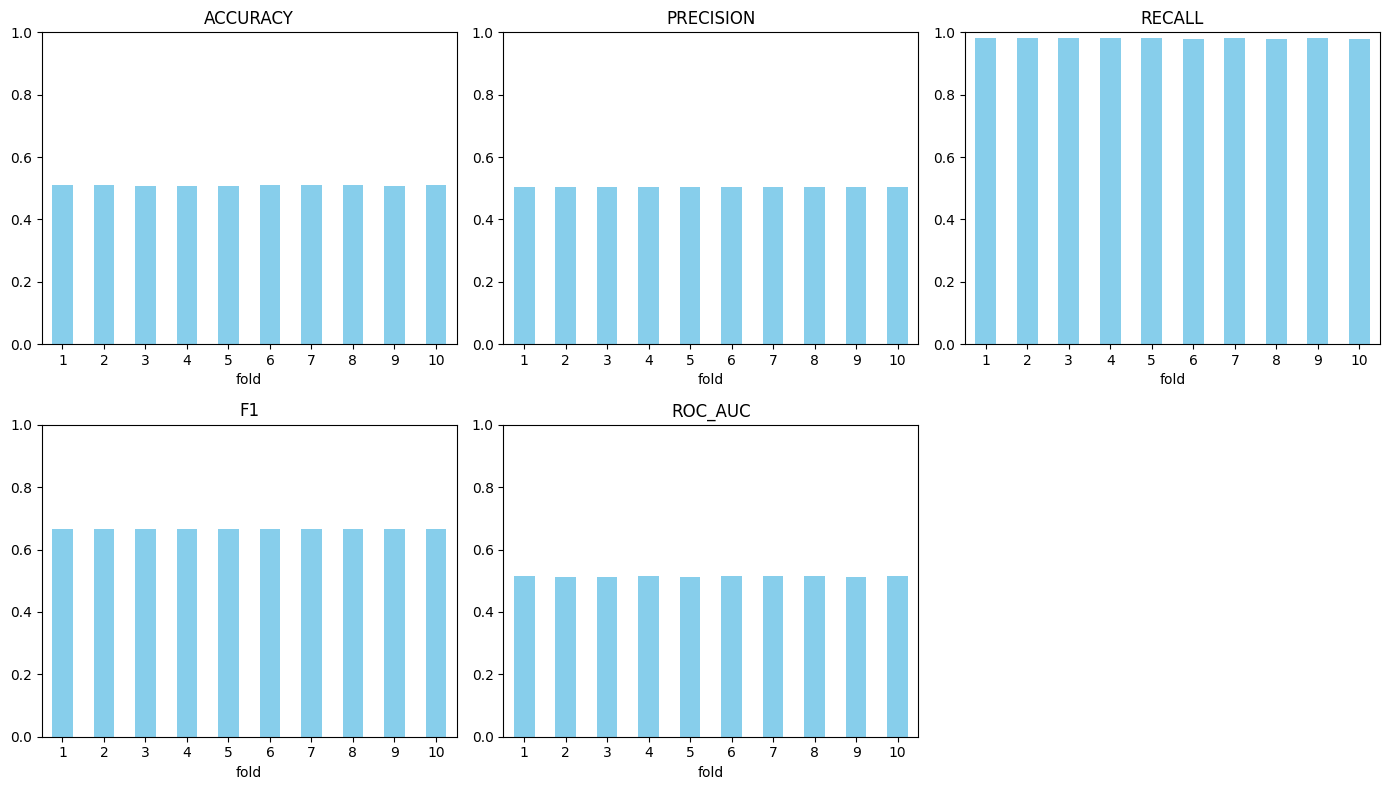

In [26]:
# Hasil tiap fold
results_df = pd.DataFrame(cv_results).set_index('fold')
print("Hasil validasi tiap fold:")
display(results_df)

# Visualisasi
plt.figure(figsize=(14, 8))
for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], 1):
    plt.subplot(2, 3, i)
    results_df[metric].plot(kind='bar', color='skyblue')
    plt.title(metric.upper())
    plt.ylim(0, 1)
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Analisis Kinerja Cross Validation

In [27]:
print("\nAnalisis Kinerja Model:")
print("Rata-rata:")
print(results_df.mean())

print("\nStandar Deviasi:")
print(results_df.std())

print("\nRange:")
print("Accuracy:", results_df['accuracy'].min(), "-", results_df['accuracy'].max())
print("Precision:", results_df['precision'].min(), "-", results_df['precision'].max())
print("Recall:", results_df['recall'].min(), "-", results_df['recall'].max())
print("F1-Score:", results_df['f1'].min(), "-", results_df['f1'].max())
print("AUC-ROC:", results_df['roc_auc'].min(), "-", results_df['roc_auc'].max())


Analisis Kinerja Model:
Rata-rata:
accuracy     0.508991
precision    0.504630
recall       0.980152
f1           0.666244
roc_auc      0.514615
dtype: float64

Standar Deviasi:
accuracy     0.000568
precision    0.000295
recall       0.001818
f1           0.000380
roc_auc      0.001409
dtype: float64

Range:
Accuracy: 0.5078414263141758 - 0.5097988349880904
Precision: 0.5040356787939017 - 0.5050554269703983
Recall: 0.9772180557520872 - 0.9820771625318366
F1-Score: 0.6656492473774679 - 0.6667521600436016
AUC-ROC: 0.5127524929155073 - 0.516765822268094


### Training Model Final

In [28]:
print("\nTraining model dengan seluruh data training...")
final_model = GaussianNB()
final_model.fit(X_train_scaled, y_train)

y_train_pred = final_model.predict(X_train_scaled)
y_train_proba = final_model.predict_proba(X_train_scaled)[:, 1]

print("\nKinerja pada Data Training:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1-Score:", f1_score(y_train, y_train_pred))
print("AUC-ROC:", roc_auc_score(y_train, y_train_proba))


Training model dengan seluruh data training...

Kinerja pada Data Training:
Accuracy: 0.5087128474703381
Precision: 0.504480145498636
Recall: 0.9812277433200481
F1-Score: 0.6663623696728006
AUC-ROC: 0.5137789453575642


### Evaluasi Data Test


Evaluasi pada Data Test...

Kinerja pada Data Test:
Accuracy: 0.5093283714085594
Precision: 0.5047988698261047
Recall: 0.9808973978010782
F1-Score: 0.66656410009856
AUC-ROC: 0.5140072762071103


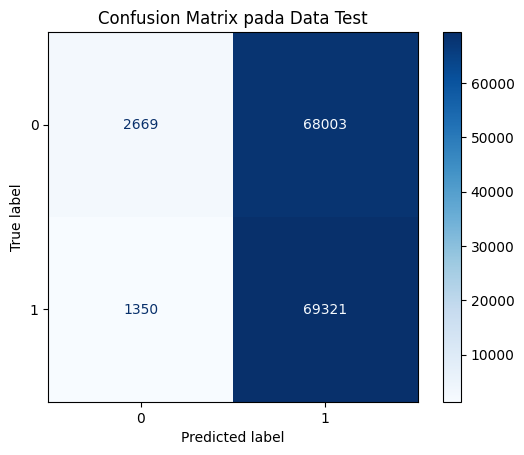

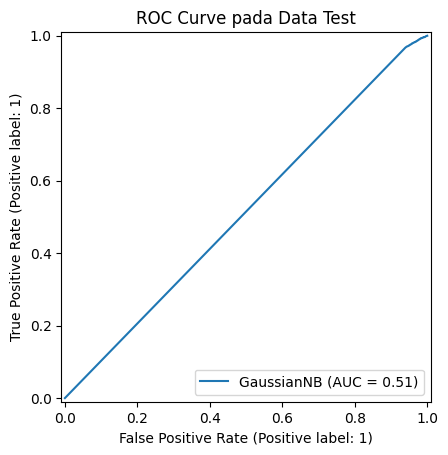

In [29]:
print("\nEvaluasi pada Data Test...")
y_test_pred = final_model.predict(X_test_scaled)
y_test_proba = final_model.predict_proba(X_test_scaled)[:, 1]

print("\nKinerja pada Data Test:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-Score:", f1_score(y_test, y_test_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_test_proba))

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix pada Data Test')
plt.show()

# ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(final_model, X_test_scaled, y_test)
plt.title('ROC Curve pada Data Test')
plt.show()

# Back Propagation Neural Network

## Kombinasi nilai parameter

In [30]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from itertools import product
import warnings

# 1. Definisi parameter space
param_grid = {
    'hidden_layer_sizes': [
        (50,),          # 1 hidden layer 50 neuron
        (100,),         # 1 hidden layer 100 neuron
        (50, 50),       # 2 hidden layers 50 neuron each
        (100, 50)       # 2 hidden layers 100 dan 50 neuron
    ],
    'learning_rate_init': [0.01, 0.001],
    'max_iter': [10, 100, 500],
    'activation': ['relu', 'logistic']  # relu(hidden)+sigmoid(output) atau semua sigmoid
}

# Generate semua kombinasi parameter
all_params = list(product(*param_grid.values()))
print(f"Total kombinasi parameter: {len(all_params)}")

Total kombinasi parameter: 48


## Eksperimen dengan Cross-Validation

In [31]:
results = []
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for i, params in enumerate(all_params):
    param_dict = {
        'hidden_layer_sizes': params[0],
        'learning_rate_init': params[1],
        'max_iter': params[2],
        'activation': params[3],
        'solver': 'adam',
        'random_state': 42,
        'early_stopping': True
    }
    
    print(f"\n=== Kombinasi {i+1}/{len(all_params)} ===")
    print(f"Parameter: {param_dict}")
    
    mlp = MLPClassifier(**param_dict)
    
    # 10-fold CV
    cv_metrics = cross_validate(
        mlp, X_train_scaled, y_train, cv=skf,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        n_jobs=-1,
        return_train_score=False
    )
    
    # Hitung mean dan std untuk semua metrik
    metrics_summary = {
        'params': param_dict,
        'accuracy': {
            'mean': np.mean(cv_metrics['test_accuracy']),
            'std': np.std(cv_metrics['test_accuracy'])
        },
        'precision': {
            'mean': np.mean(cv_metrics['test_precision']),
            'std': np.std(cv_metrics['test_precision'])
        },
        'recall': {
            'mean': np.mean(cv_metrics['test_recall']),
            'std': np.std(cv_metrics['test_recall'])
        },
        'f1': {
            'mean': np.mean(cv_metrics['test_f1']),
            'std': np.std(cv_metrics['test_f1'])
        },
        'roc_auc': {
            'mean': np.mean(cv_metrics['test_roc_auc']),
            'std': np.std(cv_metrics['test_roc_auc'])
        }
    }
    
    results.append(metrics_summary)
    
    print("\nHasil Validasi:")
    print(f"Akurasi    : {metrics_summary['accuracy']['mean']:.4f} ± {metrics_summary['accuracy']['std']:.4f}")
    print(f"Presisi    : {metrics_summary['precision']['mean']:.4f} ± {metrics_summary['precision']['std']:.4f}")
    print(f"Recall     : {metrics_summary['recall']['mean']:.4f} ± {metrics_summary['recall']['std']:.4f}")
    print(f"F1-Score   : {metrics_summary['f1']['mean']:.4f} ± {metrics_summary['f1']['std']:.4f}")
    print(f"AUC-ROC    : {metrics_summary['roc_auc']['mean']:.4f} ± {metrics_summary['roc_auc']['std']:.4f}")

# Konversi ke DataFrame
results_df = pd.DataFrame([{
    **{'params': r['params']},
    **{'accuracy_mean': r['accuracy']['mean'], 'accuracy_std': r['accuracy']['std']},
    **{'precision_mean': r['precision']['mean'], 'precision_std': r['precision']['std']},
    **{'recall_mean': r['recall']['mean'], 'recall_std': r['recall']['std']},
    **{'f1_mean': r['f1']['mean'], 'f1_std': r['f1']['std']},
    **{'roc_auc_mean': r['roc_auc']['mean'], 'roc_auc_std': r['roc_auc']['std']}
} for r in results])

print("\nRingkasan Semua Kombinasi:")
display(results_df.sort_values('roc_auc_mean', ascending=False).head(10))


=== Kombinasi 1/48 ===
Parameter: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 10, 'activation': 'relu', 'solver': 'adam', 'random_state': 42, 'early_stopping': True}

Hasil Validasi:
Akurasi    : 0.7084 ± 0.0027
Presisi    : 0.6998 ± 0.0077
Recall     : 0.7305 ± 0.0199
F1-Score   : 0.7146 ± 0.0062
AUC-ROC    : 0.7789 ± 0.0029

=== Kombinasi 2/48 ===
Parameter: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 10, 'activation': 'logistic', 'solver': 'adam', 'random_state': 42, 'early_stopping': True}

Hasil Validasi:
Akurasi    : 0.7246 ± 0.0026
Presisi    : 0.7128 ± 0.0060
Recall     : 0.7525 ± 0.0160
F1-Score   : 0.7320 ± 0.0052
AUC-ROC    : 0.7957 ± 0.0024

=== Kombinasi 3/48 ===
Parameter: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'max_iter': 100, 'activation': 'relu', 'solver': 'adam', 'random_state': 42, 'early_stopping': True}

Hasil Validasi:
Akurasi    : 0.7206 ± 0.0029
Presisi    : 0.7001 ± 0.0047
Recall     : 0.77

,params,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std
47,"{'hidden_layer_sizes': (100, 50), 'learning_ra...",0.841808,0.008828,0.785936,0.008516,0.939594,0.007773,0.855912,0.007753,0.889861,0.004734
41,"{'hidden_layer_sizes': (100, 50), 'learning_ra...",0.816284,0.002480,0.768955,0.005278,0.904464,0.011247,0.831153,0.002937,0.880600,0.002988
39,"{'hidden_layer_sizes': (100, 50), 'learning_ra...",0.816102,0.002350,0.769320,0.005088,0.903125,0.009880,0.830812,0.002568,0.880402,0.002942
45,"{'hidden_layer_sizes': (100, 50), 'learning_ra...",0.818918,0.002523,0.767367,0.004534,0.915454,0.008919,0.834851,0.002580,0.876175,0.001848
46,"{'hidden_layer_sizes': (100, 50), 'learning_ra...",0.815121,0.004184,0.773504,0.004762,0.891300,0.009897,0.828193,0.004326,0.872712,0.002287
44,"{'hidden_layer_sizes': (100, 50), 'learning_ra...",0.813793,0.002997,0.774083,0.005293,0.886371,0.007297,0.826392,0.002593,0.872029,0.001746
15,"{'hidden_layer_sizes': (100,), 'learning_rate_...",0.787420,0.002029,0.758570,0.007629,0.843681,0.016817,0.798691,0.003899,0.852607,0.001885
17,"{'hidden_layer_sizes': (100,), 'learning_rate_...",0.787420,0.002029,0.758570,0.007629,0.843681,0.016817,0.798691,0.003899,0.852607,0.001885
23,"{'hidden_layer_sizes': (100,), 'learning_rate_...",0.785251,0.004702,0.759131,0.004209,0.835681,0.008992,0.795544,0.005042,0.848277,0.004040
21,"{'hidden_layer_sizes': (100,), 'learning_rate_...",0.781977,0.002932,0.758364,0.003655,0.827724,0.005716,0.791511,0.002940,0.845868,0.003125


## Pemilihan Model Terbaik dan Training Model

In [37]:
# Pilih parameter terbaik berdasarkan AUC-ROC
best_result = results_df.loc[results_df['roc_auc_mean'].idxmax()]
best_params = best_result['params']

print("\nBest Parameters")
print(f"Hidden Layers: {best_params['hidden_layer_sizes']}")
print(f"Learning Rate: {best_params['learning_rate_init']}")
print(f"Epochs: {best_params['max_iter']}")
print(f"Activation: {best_params['activation']}")
print(f"\nPerformance:")
print(f"AUC-ROC: {best_result['roc_auc_mean']:.4f} ± {best_result['roc_auc_std']:.4f}")
print(f"F1-Score: {best_result['f1_mean']:.4f} ± {best_result['f1_std']:.4f}")

# Training model final dengan seluruh data training
final_model = MLPClassifier(**best_params)
final_model.fit(X_train_scaled, y_train)

# Evaluasi pada training set
y_train_pred = final_model.predict(X_train_scaled)
y_train_proba = final_model.predict_proba(X_train_scaled)[:, 1]

print("\nTraining Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_train, y_train_proba):.4f}")


Best Parameters
Hidden Layers: (100, 50)
Learning Rate: 0.001
Epochs: 500
Activation: logistic

Performance:
AUC-ROC: 0.8899 ± 0.0047
F1-Score: 0.8559 ± 0.0078

Training Set Performance:
Accuracy: 0.8759
Precision: 0.8335
Recall: 0.9395
F1-Score: 0.8833
AUC-ROC: 0.9331


## Evaluasi pada Test Set


=== Test Set Performance ===
Accuracy: 0.8409
Precision: 0.7923
Recall: 0.9241
F1-Score: 0.8531
AUC-ROC: 0.8914


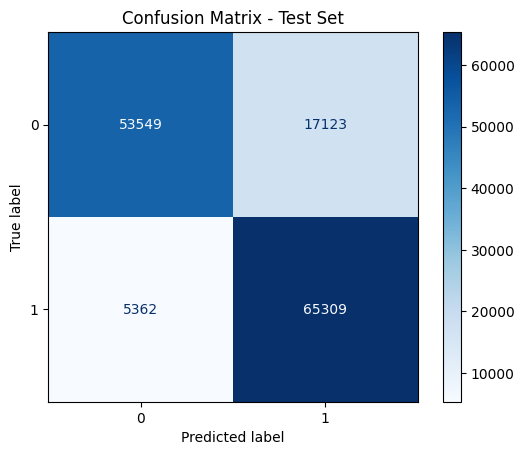

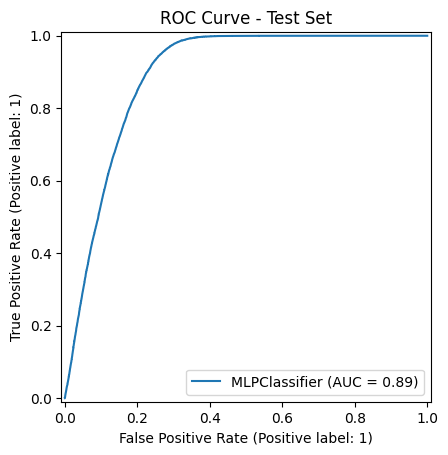

In [38]:
# Evaluasi pada test set
y_test_pred = final_model.predict(X_test_scaled)
y_test_proba = final_model.predict_proba(X_test_scaled)[:, 1]

print("\n=== Test Set Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_test_proba):.4f}")

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

# ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(final_model, X_test_scaled, y_test)
plt.title('ROC Curve - Test Set')
plt.show()

# k-NN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"  # Membatasi jumlah core yang digunakan
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Daftar nilai k yang akan diuji
k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

# Dictionary untuk menyimpan hasil
results = {
    'k': [],
    'mean_accuracy': [],
    'std_accuracy': [],
    'mean_precision': [],
    'std_precision': [],
    'mean_recall': [],
    'std_recall': [],
    'mean_f1': [],
    'std_f1': [],
    'mean_roc_auc': [],
    'std_roc_auc': []
}

# Eksperimen untuk setiap nilai k
for k in k_values:
    print(f"\nEksperimen dengan k = {k}")
    
    # Inisialisasi model k-NN dengan n_jobs=-1 untuk memanfaatkan semua core
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1, algorithm='auto')
    
    # List untuk menyimpan hasil tiap fold
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    roc_aucs = []
    
    # Gunakan StratifiedKFold yang sudah Anda buat sebelumnya
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train)):
        X_train_fold, X_val_fold = X_train_scaled.iloc[train_idx], X_train_scaled.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Fit model
        knn.fit(X_train_fold, y_train_fold)
        
        # Prediksi dengan n_jobs=-1
        y_pred = knn.predict(X_val_fold)
        y_pred_proba = knn.predict_proba(X_val_fold)[:, 1]
        
        # Hitung metrik
        accuracies.append(accuracy_score(y_val_fold, y_pred))
        precisions.append(precision_score(y_val_fold, y_pred))
        recalls.append(recall_score(y_val_fold, y_pred))
        f1_scores.append(f1_score(y_val_fold, y_pred))
        roc_aucs.append(roc_auc_score(y_val_fold, y_pred_proba))
    
    # Simpan hasil rata-rata dan std dev
    results['k'].append(k)
    results['mean_accuracy'].append(np.mean(accuracies))
    results['std_accuracy'].append(np.std(accuracies))
    results['mean_precision'].append(np.mean(precisions))
    results['std_precision'].append(np.std(precisions))
    results['mean_recall'].append(np.mean(recalls))
    results['std_recall'].append(np.std(recalls))
    results['mean_f1'].append(np.mean(f1_scores))
    results['std_f1'].append(np.std(f1_scores))
    results['mean_roc_auc'].append(np.mean(roc_aucs))
    results['std_roc_auc'].append(np.std(roc_aucs))
    
    # Print hasil untuk k ini
    print(f"Akurasi: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"Presisi: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
    print(f"Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
    print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"AUC ROC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")

# Konversi hasil ke DataFrame
results_df = pd.DataFrame(results)

# Temukan k terbaik berdasarkan F1-Score
best_k_row = results_df.loc[results_df['mean_f1'].idxmax()]
best_k = best_k_row['k']
print(f"\nNilai k terbaik: {best_k} dengan F1-Score: {best_k_row['mean_f1']:.4f}")

# Evaluasi model terbaik pada data test
best_knn = KNeighborsClassifier(n_neighbors=int(best_k), n_jobs=-1, algorithm='auto')
best_knn.fit(X_train_scaled, y_train)

y_test_pred = best_knn.predict(X_test_scaled)
y_test_pred_proba = best_knn.predict_proba(X_test_scaled)[:, 1]

test_metrics = {
    'accuracy': accuracy_score(y_test, y_test_pred),
    'precision': precision_score(y_test, y_test_pred),
    'recall': recall_score(y_test, y_test_pred),
    'f1': f1_score(y_test, y_test_pred),
    'roc_auc': roc_auc_score(y_test, y_test_pred_proba)
}

print("\nEvaluasi Model Terbaik pada Data Test:")
for metric, value in test_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")


Eksperimen dengan k = 3
Akurasi: 0.8999 ± 0.0009
Presisi: 0.8347 ± 0.0012
Recall: 0.9974 ± 0.0005
F1-Score: 0.9088 ± 0.0007
AUC ROC: 0.9462 ± 0.0009

Eksperimen dengan k = 5
Akurasi: 0.8566 ± 0.0009
Presisi: 0.7814 ± 0.0010
Recall: 0.9902 ± 0.0008
F1-Score: 0.8735 ± 0.0007
AUC ROC: 0.9387 ± 0.0009

Eksperimen dengan k = 7
Akurasi: 0.8169 ± 0.0011
Presisi: 0.7409 ± 0.0012
Recall: 0.9747 ± 0.0014
F1-Score: 0.8419 ± 0.0009
AUC ROC: 0.9151 ± 0.0013

Eksperimen dengan k = 9
Akurasi: 0.7819 ± 0.0015
Presisi: 0.7114 ± 0.0014
Recall: 0.9486 ± 0.0015
F1-Score: 0.8131 ± 0.0011
AUC ROC: 0.8790 ± 0.0014

Eksperimen dengan k = 11
Akurasi: 0.7525 ± 0.0017
Presisi: 0.6909 ± 0.0015
Recall: 0.9138 ± 0.0024
F1-Score: 0.7869 ± 0.0015
AUC ROC: 0.8459 ± 0.0016

Eksperimen dengan k = 13
Akurasi: 0.7297 ± 0.0019
Presisi: 0.6779 ± 0.0015
Recall: 0.8752 ± 0.0030
F1-Score: 0.7640 ± 0.0018
AUC ROC: 0.8227 ± 0.0019

Eksperimen dengan k = 15
Akurasi: 0.7160 ± 0.0024
Presisi: 0.6721 ± 0.0020
Recall: 0.8434 ± 0.003

# Logistic Regression

## 10-fold cross validation

In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

nb_model = LogisticRegression(max_iter=1000)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = []

print("10-fold cross validation...")
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train), 1):
    X_train_fold, X_val_fold = X_train_scaled.iloc[train_idx], X_train_scaled.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    print(f"Fold {fold}")
    print(f"  Train: index={train_idx[:5]}... ({len(train_idx)} rows)")
    print(f"  Test:  index={val_idx[:5]}... ({len(val_idx)} rows)")
    
    # Training model
    nb_model.fit(X_train_fold, y_train_fold)
    
    # Prediksi
    y_pred = nb_model.predict(X_val_fold)
    y_proba = nb_model.predict_proba(X_val_fold)[:, 1]
    
    # Hitung metrik
    cv_results.append({
        'fold': fold,
        'accuracy': accuracy_score(y_val_fold, y_pred),
        'precision': precision_score(y_val_fold, y_pred),
        'recall': recall_score(y_val_fold, y_pred),
        'f1': f1_score(y_val_fold, y_pred),
        'roc_auc': roc_auc_score(y_val_fold, y_proba)
    })

print("Done")

10-fold cross validation...
Fold 1
  Train: index=[0 1 3 4 5]... (381626 rows)
  Test:  index=[ 2 15 19 21 22]... (42403 rows)
Fold 2
  Train: index=[1 2 3 4 5]... (381626 rows)
  Test:  index=[ 0 12 27 29 35]... (42403 rows)
Fold 3
  Train: index=[0 1 2 4 5]... (381626 rows)
  Test:  index=[ 3 40 47 52 86]... (42403 rows)
Fold 4
  Train: index=[0 1 2 3 5]... (381626 rows)
  Test:  index=[ 4 28 33 34 36]... (42403 rows)
Fold 5
  Train: index=[0 1 2 3 4]... (381626 rows)
  Test:  index=[16 17 18 20 42]... (42403 rows)
Fold 6
  Train: index=[0 1 2 3 4]... (381626 rows)
  Test:  index=[ 8 11 26 51 57]... (42403 rows)
Fold 7
  Train: index=[0 1 2 3 4]... (381626 rows)
  Test:  index=[ 7 14 23 31 65]... (42403 rows)
Fold 8
  Train: index=[0 2 3 4 5]... (381626 rows)
  Test:  index=[ 1 10 13 32 39]... (42403 rows)
Fold 9
  Train: index=[0 1 2 3 4]... (381626 rows)
  Test:  index=[ 5  6  9 55 76]... (42403 rows)
Fold 10
  Train: index=[0 1 2 3 4]... (381627 rows)
  Test:  index=[30 44 59 82 9

## Metrik Cross Validation

Hasil validasi tiap fold:


,accuracy,precision,recall,f1,roc_auc
fold,,,,,
1,0.680895,0.682704,0.675974,0.679322,0.742631
2,0.680848,0.683478,0.673710,0.678559,0.744279
3,0.684669,0.686337,0.680219,0.683264,0.749212
4,0.685447,0.688459,0.677483,0.682927,0.748111
5,0.682239,0.684492,0.676163,0.680302,0.748072
6,0.681626,0.682566,0.679025,0.680791,0.746087
7,0.680824,0.682487,0.676242,0.679350,0.744216
8,0.678914,0.679763,0.676525,0.678140,0.745892
9,0.686131,0.688245,0.680487,0.684344,0.750666


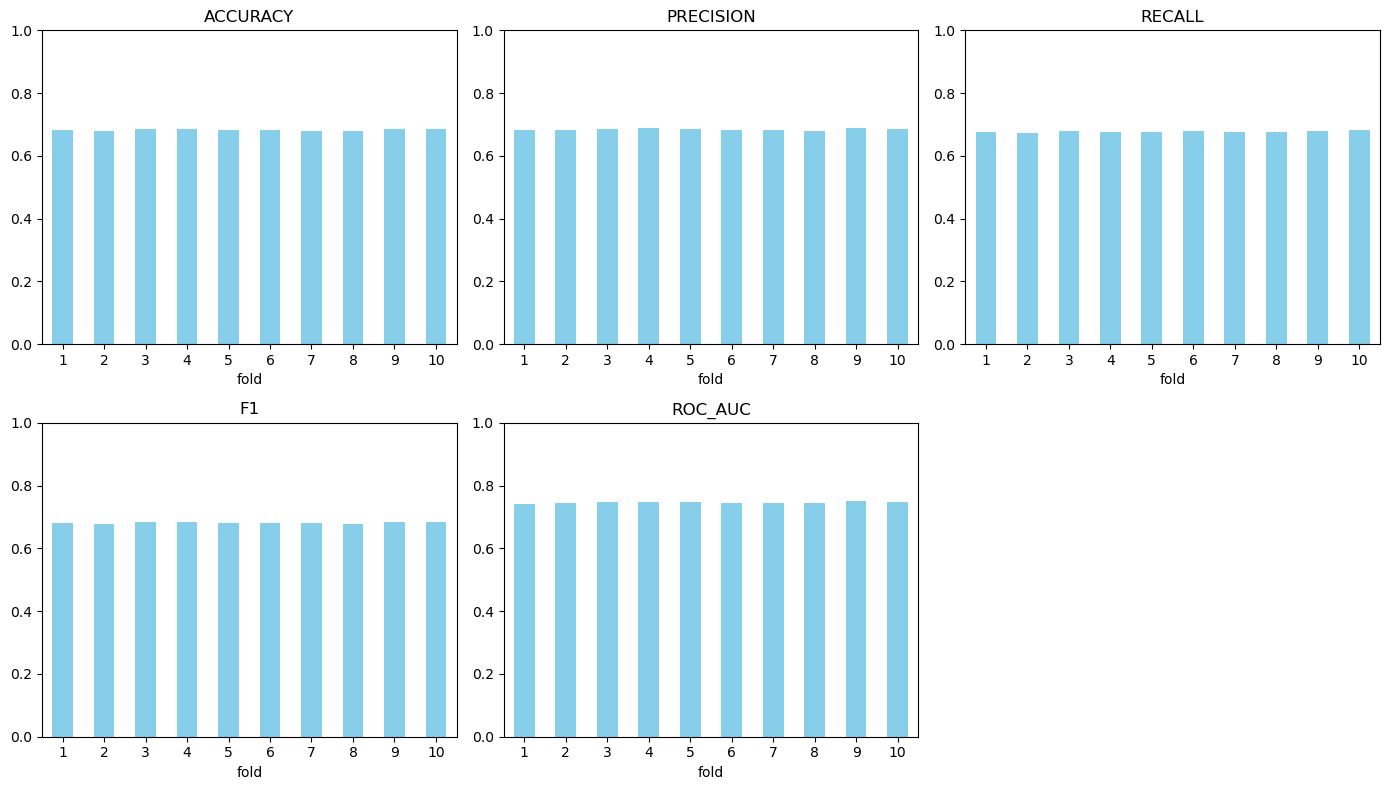

In [26]:
# Hasil tiap fold
results_df = pd.DataFrame(cv_results).set_index('fold')
print("Hasil validasi tiap fold:")
display(results_df)

# Visualisasi
plt.figure(figsize=(14, 8))
for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], 1):
    plt.subplot(2, 3, i)
    results_df[metric].plot(kind='bar', color='skyblue')
    plt.title(metric.upper())
    plt.ylim(0, 1)
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Analisis Kinerja Cross Validation

In [27]:
print("\nAnalisis Kinerja Model:")
print("Rata-rata:")
print(results_df.mean())

print("\nStandar Deviasi:")
print(results_df.std())

print("\nRange:")
print("Accuracy:", results_df['accuracy'].min(), "-", results_df['accuracy'].max())
print("Precision:", results_df['precision'].min(), "-", results_df['precision'].max())
print("Recall:", results_df['recall'].min(), "-", results_df['recall'].max())
print("F1-Score:", results_df['f1'].min(), "-", results_df['f1'].max())
print("AUC-ROC:", results_df['roc_auc'].min(), "-", results_df['roc_auc'].max())


Analisis Kinerja Model:
Rata-rata:
accuracy     0.682583
precision    0.684337
recall       0.677844
f1           0.681072
roc_auc      0.746551
dtype: float64

Standar Deviasi:
accuracy     0.002388
precision    0.002737
recall       0.002679
f1           0.002299
roc_auc      0.002482
dtype: float64

Range:
Accuracy: 0.6789142277669032 - 0.6861306982996486
Precision: 0.6797630331753555 - 0.6884585889570553
Recall: 0.6737100273559098 - 0.6826093108815622
F1-Score: 0.6781399966903856 - 0.6843440931622513
AUC-ROC: 0.7426313171123377 - 0.750666387318516


## Training Model Final

In [30]:
print("\nTraining model dengan seluruh data training...")
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_scaled, y_train)

y_train_pred = final_model.predict(X_train_scaled)
y_train_proba = final_model.predict_proba(X_train_scaled)[:, 1]

print("\nKinerja pada Data Training:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1-Score:", f1_score(y_train, y_train_pred))
print("AUC-ROC:", roc_auc_score(y_train, y_train_proba))


Training model dengan seluruh data training...

Kinerja pada Data Training:
Accuracy: 0.6828495220845744
Precision: 0.6845362198802349
Recall: 0.6782821970143622
F1-Score: 0.6813948584790556
AUC-ROC: 0.7470260473697334


## Evaluasi Data


Evaluasi pada Data Test...

Kinerja pada Data Test:
Accuracy: 0.6852408679595028
Precision: 0.6868647938791824
Recall: 0.6808874927480862
F1-Score: 0.6838630824219943
AUC-ROC: 0.7489626057563988


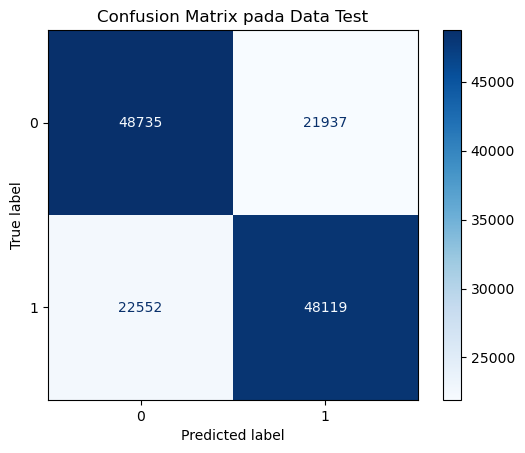

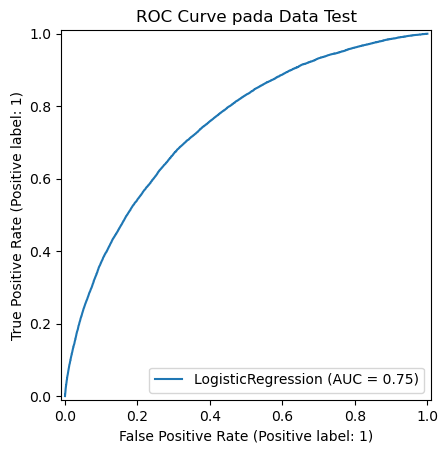

In [31]:
print("\nEvaluasi pada Data Test...")
y_test_pred = final_model.predict(X_test_scaled)
y_test_proba = final_model.predict_proba(X_test_scaled)[:, 1]

print("\nKinerja pada Data Test:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-Score:", f1_score(y_test, y_test_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_test_proba))

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix pada Data Test')
plt.show()

# ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(final_model, X_test_scaled, y_test)
plt.title('ROC Curve pada Data Test')
plt.show()

# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Asumsi X_train_scaled, X_test_scaled, y_train, y_test sudah tersedia

print("\n=== Training SVM Model ===")

# Definisikan parameter grid untuk tuning
param_grid = {
    'C': [0.1, 1, 10],  # Batasi untuk efisiensi
    'gamma': ['scale', 'auto', 0.1],  # Nilai umum untuk RBF
}

# Inisialisasi model SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Gunakan GridSearchCV dengan n_jobs=-1 untuk memanfaatkan semua core CPU
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1', n_jobs=4, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print("\nParameter terbaik:", grid_search.best_params_)

# Evaluasi pada data training
print("\nEvaluasi pada Data Training...")
y_train_pred = best_model.predict(X_train_scaled)
y_train_proba = best_model.predict_proba(X_train_scaled)[:, 1]

print("\nKinerja pada Data Training:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1-Score:", f1_score(y_train, y_train_pred))
print("AUC-ROC:", roc_auc_score(y_train, y_train_proba))

# Evaluasi pada data test
print("\nEvaluasi pada Data Test...")
y_test_pred = best_model.predict(X_test_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

print("\nKinerja pada Data Test:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-Score:", f1_score(y_test, y_test_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_test_proba))


=== Training SVM Model ===
Fitting 5 folds for each of 9 candidates, totalling 45 fits


## Confusion Matrix

In [ ]:
y_cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=y_cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix pada Data Test (SVM)')
plt.show()

## ROC Curve

In [ ]:
RocCurveDisplay.from_estimator(svm_model, X_test_scaled, y_test)
plt.title('ROC Curve pada Data Test (SVM)')
plt.show()

# Decision Tree Classifier


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print('Classification report:\n', 
    metrics.classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     70672
           1       0.91      1.00      0.95     70671

    accuracy                           0.95    141343
   macro avg       0.95      0.95      0.95    141343
weighted avg       0.95      0.95      0.95    141343



In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, make_scorer

# Parameter grid
param_grid = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [10, 50],
    'criterion': ['gini', 'entropy']
}

# Model dasar
dt = DecisionTreeClassifier()

# Skor gabungan untuk evaluasi multi-metrik
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Grid Search dengan Cross Validation
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring=scoring,
    cv=10,
    refit='f1',  # pilih metrik utama sebagai acuan model terbaik
    return_train_score=False,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [10, 50], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

In [51]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)

# Ambil rataan dan standar deviasi dari hasil 10-fold cross-validation
mean_scores = cv_results[['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall',
                        'mean_test_f1', 'mean_test_roc_auc']]
std_scores = cv_results[['std_test_accuracy', 'std_test_precision', 'std_test_recall',
                        'std_test_f1', 'std_test_roc_auc']]

# Gabungkan dan tampilkan
summary = pd.concat([mean_scores, std_scores], axis=1)
summary['params'] = cv_results['params']


In [52]:
# Model terbaik dari GridSearch
best_model = grid_search.best_estimator_

# Fit ulang ke seluruh data latih
best_model.fit(X_train, y_train)

# Evaluasi pada data training
y_train_pred = best_model.predict(X_train)
print("Train classification report:")
print(classification_report(y_train, y_train_pred))


Train classification report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63    212014
           1       0.63      0.62      0.63    212015

    accuracy                           0.63    424029
   macro avg       0.63      0.63      0.63    424029
weighted avg       0.63      0.63      0.63    424029



In [53]:
from sklearn.metrics import roc_auc_score

y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

print("Test classification report:")
print(classification_report(y_test, y_test_pred))
print("AUC ROC:", roc_auc_score(y_test, y_test_proba))


Test classification report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63     70672
           1       0.63      0.62      0.63     70671

    accuracy                           0.63    141343
   macro avg       0.63      0.63      0.63    141343
weighted avg       0.63      0.63      0.63    141343

AUC ROC: 0.6682060519247488


# Kesimpulan

Naive Bayes

Kinerja pada Data Test:
Accuracy: 0.5093283714085594
Precision: 0.5047988698261047
Recall: 0.9808973978010782
F1-Score: 0.66656410009856
AUC-ROC: 0.5140072762071103

BPNN

=== Test Set Performance ===
Accuracy: 0.8409
Precision: 0.7923
Recall: 0.9241
F1-Score: 0.8531
AUC-ROC: 0.8914

KNN:

Evaluasi Model Terbaik pada Data Test:
Accuracy: 0.9093
Precision: 0.8472
Recall: 0.9986
F1: 0.9167
Roc_auc: 0.9519

Logistic Regression:

Kinerja pada Data Test:
Accuracy: 0.6852408679595028
Precision: 0.6868647938791824
Recall: 0.6808874927480862
F1-Score: 0.6838630824219943
AUC-ROC: 0.7489626057563988

Decission Tree:

Test classification report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63     70672
           1       0.63      0.62      0.63     70671

    accuracy                           0.63    141343
   macro avg       0.63      0.63      0.63    141343
weighted avg       0.63      0.63      0.63    141343

AUC ROC: 0.6682060519247488

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Alasan kenapa KN yang paling bagus
Akurasi Tertinggi (90.93%): Artinya model ini paling sering membuat prediksi yang benar.
Recall Hampir Sempurna (99.86%): Model ini sangat jarang melewatkan kasus positif (false negatives sangat kecil).
Precision Tinggi (84.72%): Mayoritas prediksi positif memang benar → false positives juga rendah.
F1-Score dan AUC ROC Sangat Tinggi: Artinya model ini seimbang antara ketepatan dan cakupan (precision vs recall), dan sangat baik dalam membedakan kelas 0 dan 1.

Kesimpulan : KNN bekerja sangat efektif karena data ini kemungkinan memiliki pola yang bisa ditangkap dengan perbandingan jarak antar titik (karakteristik data yang “rapi” dan terstruktur secara lokal). Cocok ketika jumlah data masih bisa ditangani dengan efisien.
Alasan BPNN unggul:

Kinerja Sangat Tinggi di Semua Metrik:
Akurasi tinggi (84.09%)
Recall tinggi (92.41%) → jarang melewatkan kasus positif
Precision juga kuat (79.23%) → prediksi positif cukup akurat
AUC ROC mendekati 0.9 → model sangat baik dalam membedakan dua kelas
Kemampuan Menangkap Pola Kompleks: BPNN unggul karena mampu belajar representasi non-linear dan kompleks dari fitur-fitur input.
Fleksibel & Powerful: Dapat disesuaikan dengan banyak layer dan neuron untuk meningkatkan performa seiring dengan kompleksitas data.

Kesimpulan : BPNN menang karena kemampuan belajarnya yang kuat, terutama pada data yang relasi antar fiturnya tidak linier atau kompleks.

📌 Kesimpulan Umum
KNN adalah model terbaik dari sisi kinerja mentah (skor tertinggi di semua metrik), sangat cocok untuk data yang terstruktur dengan baik dan tidak terlalu besar.

BPNN hampir menyamai KNN dalam performa, dan lebih unggul dalam fleksibilitas, menjadikannya pilihan yang sangat baik untuk data besar atau kompleks.

Model lain (LogReg, Decision Tree, Naive Bayes) memiliki performa jauh lebih rendah, baik dari segi akurasi maupun ketajaman prediksi.